In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import to_categorical

## Load MNIST Dataset


In [4]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

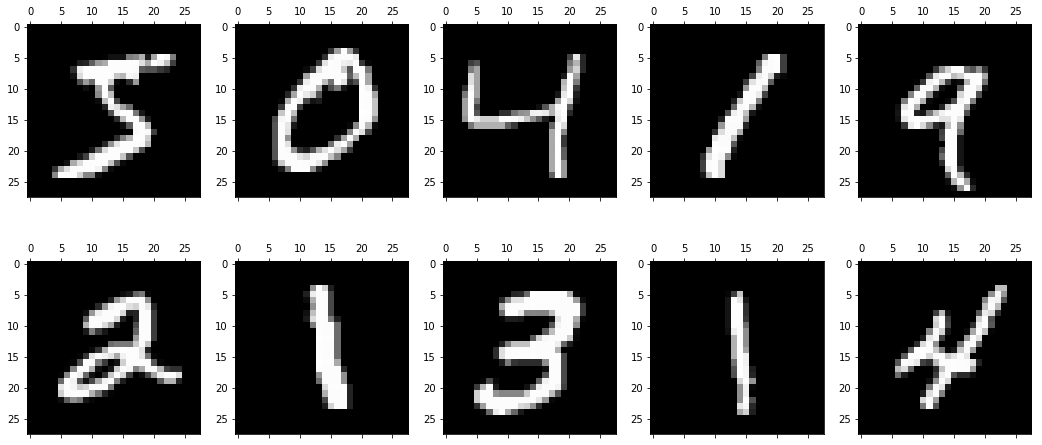

In [6]:
plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [7]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [10]:
# One hot encoding
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


### Define Sigmoid

In [11]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

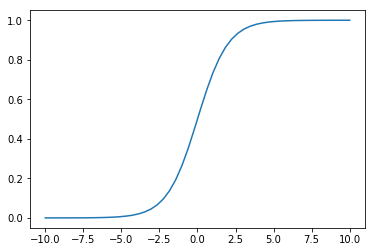

In [8]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Define Cross Entropy

In [12]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Single-layer Neural Network

In [10]:
num_epoch = 100
learning_rate = 0.1

w = np.random.uniform(low=-1.0, high=1.0, size=(784, 10))
b = np.random.uniform(low=-1.0, high=1.0, size=10)

for epoch in range(num_epoch):
    y_predict_hot = X_train.dot(w) + b
    y_predict_hot = sigmoid(y_predict_hot)
    
    y_predict = np.argmax(y_predict_hot, axis=1)
    accuracy = (y_predict == y_train).mean()
    if accuracy > 0.8:
        break

    loss = cross_entropy(y_train_hot, y_predict_hot)

    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

    w = w - learning_rate * X_train.T.dot(y_predict_hot - y_train_hot)
    b = b - learning_rate * (y_predict_hot - y_train_hot).mean(axis=0)


print("----" * 10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

 0 accuracy = 0.06900, loss = 17.70191
10 accuracy = 0.74303, loss = 1.97501
20 accuracy = 0.76300, loss = 1.41081
----------------------------------------
30 accuracy = 0.80018, loss = 1.38306


## Evaluate

### Train

In [11]:
y_predict_hot = X_train.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

train_result = pd.DataFrame({'actual': y_train, 'predict': y_predict})

train_accuracy = (train_result["actual"] == train_result["predict"]).mean()

print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(train) = 0.80018
(60000, 2)


,actual,predict
0,5,5
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


### Test

In [12]:
y_predict_hot = X_test.dot(w) + b
y_predict_hot = sigmoid(y_predict_hot)
y_predict = np.argmax(y_predict_hot, axis=1)

test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

test_accuracy = (test_result["actual"] == test_result["predict"]).mean()

print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.80370
(10000, 2)


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,0
9,9,0


## Multi-layer Neural Network

In [13]:
num_epoch = 300
learning_rate = 0.000001

w1 = np.random.uniform(low=-0.057, high=0.057, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=0.077, size=(1000, 10))

b1 = np.zeros((1, 1000))
b2 = np.zeros((1, 10))

for epoch in range(num_epoch):
    
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)

    y_predict_hot = a2
    y_predict = np.argmax(y_predict_hot, axis=1)
    accuracy = (y_predict == y_train).mean()
    
    if accuracy > 0.9:
        break

    loss = cross_entropy(y_train_hot, y_predict_hot)

    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

    d2 = a2 - y_train_hot
    d1 = d2.dot(w2.T) * a1 * (1 - a1)

    w2 = w2 - learning_rate * a1.T.dot(d2) 
    w1 = w1 - learning_rate * X_train.T.dot(d1) 
    b2 = b2 - learning_rate * d2.mean(axis=0)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----" * 10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

 0 accuracy = 0.10062, loss = 1.02882
10 accuracy = 0.80643, loss = 0.15778
20 accuracy = 0.85633, loss = 0.12243
30 accuracy = 0.87738, loss = 0.10546
40 accuracy = 0.88865, loss = 0.09486
50 accuracy = 0.89675, loss = 0.08738
----------------------------------------
55 accuracy = 0.90007, loss = 0.08493


### Train (Result)

In [14]:
z1 = X_train.dot(w1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(w2) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=1)

train_result = pd.DataFrame({'actual': y_train, 'predict': y_predict})

train_accuracy = (train_result["actual"] == train_result["predict"]).mean()

print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(train) = 0.90007
(60000, 2)


,actual,predict
0,5,5
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


### Test (Result)

In [15]:
z1 = X_test.dot(w1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(w2) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=1)

test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

test_accuracy = (test_result["actual"] == test_result["predict"]).mean()

print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.89620
(10000, 2)


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9
